<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/5%EA%B0%95_k_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




비모수적 확률밀도 추정과 최근접 이웃 분류기

부피 V를 x의 함수, 데이터 수 K 고정 
$$p(x|C_i) = \frac{1}{V_i(x)}\frac{K}{N}$$

$$V_i(x)를　d(x,x^i_K)를　반경으로　하는　r_i(x)에　n차원　입력　공간상의 단위구　u_n의　곱으로　변경$$

단위구가 뭔지 궁금하시다면 따로 공부 하시는 거 추천...

$$p(x|C_i) = \frac{1}{u_n}\frac{1}{(r_i(x))^n}\frac{K}{N}$$

베이지안분류기 정의(데이터 x가 각 클래스로부터 생성되었을 확률을 계산하고, 이것들 가장 높은 확률을 가지는 클래스로 할당)에 따라 식을 아래와 같이 변경

$$y(x)=argmin_i\{r_i(x)\}$$

** 가장 가까운 데이터의 클래스에 따라 같이 할당

Class a,b,c의 데이터 생성

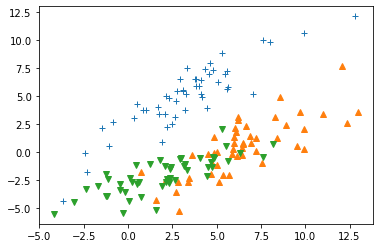

In [137]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np

np.random.seed(50)
row_count = 50

mean_a = np.array([3,5])
cov_a = np.array([[6,2],[3,6]])
rand_std_a = np.random.randn(row_count, 2)
class_a = rand_std_a @ np.sqrt(cov_a) + mean_a


mean_b = np.array([7,1])
cov_b = np.array([[5,1],[1,5]])
rand_std_b = np.random.randn(row_count, 2)
class_b = rand_std_b @ np.sqrt(cov_b) + mean_b

mean_c = np.array([2,-2])
cov_c = np.array([[4,3],[3,0]])
rand_std_c = np.random.randn(row_count, 2)
class_c = rand_std_c @ np.sqrt(cov_c) + mean_c

mean_a,cov_a,class_a.shape
mean_b,cov_b,class_b.shape
mean_c,cov_c,class_c.shape

plt.plot(class_a[:,0], class_a[:,1], marker='+', linestyle='None')
plt.plot(class_b[:,0], class_b[:,1], marker='^', linestyle='None')
plt.plot(class_c[:,0], class_c[:,1], marker='v', linestyle='None')

Class a,b,c의 데이터 가시화

K_NearestNeighbor

In [141]:
k = 5 # 몇 개의 이웃한 데이터를 점검할 지 지정

0.207 %


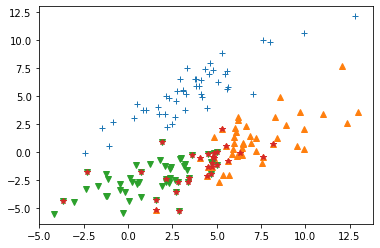

In [142]:
Etrain = 0 #Error train
Etrain_list=[] #Error train 으로 분류된 것을 표시하기 위해 선언
Error_rate = 0 #오분류율

# 근접이웃 분류기를 통해 새롭게 데이터 분류 
class_new_a_list=[] 
class_new_b_list=[] 
class_new_c_list=[] 

distance_list = [] # 해당 데이터와 나머지 전체 데이터 사이의 거리
class_vstack = np.vstack([class_a,class_b,class_c])

for i in range(len(class_vstack)):
  id_i = class_vstack[i]

  distance_list.clear() #각 데이터 마다 거리 순위를 뽑아야 하므로 거리 리스트는 초기화
  
  for j in range(1,len(class_vstack)):
    distance = np.linalg.norm(id_i-class_vstack[j],2) #거리함수는 2차 norm(유클리디안 거리) 사용
    distance_list.append([distance,j])  # j를 함께 리스트에 넣어주는 이유는 라벨링 때문
  
  distance_list.sort(key=lambda x:x[0]) # 가장 가까운 순으로 정렬

  count=[0,0,0] 
  for j in range(0,k):                  # k개 만큼 이웃한 데이터의 투표 진행
    if distance_list[j][1] < row_count*1:
      count[0] = count[0]+1
    elif distance_list[j][1] >= row_count*1 and distance_list[j][1] < row_count*2:
      count[1] = count[1]+1
    elif distance_list[j][1] >= row_count*2:
      count[2] = count[2]+1
  
  tmp = max(count)
  index = count.index(tmp)              # 투표 결과 공개
  
  if index == 0:                        # 투표 결과에 따라 분류가 잘못된 것을 뽑음
    class_new_a_list.append(id_i)
    if id_i not in class_a:
      Etrain = Etrain +1
      Etrain_list.append(id_i)
  elif index == 1:
    class_new_b_list.append(id_i)
    if id_i not in class_b:
      Etrain = Etrain +1
      Etrain_list.append(id_i)
  else :
    class_new_c_list.append(id_i)
    if id_i not in class_c:
      Etrain = Etrain +1
      Etrain_list.append(id_i)

Error_rate = Etrain/(class_vstack.shape[0])

class_new_a=np.array(class_new_a_list)
class_new_b=np.array(class_new_b_list)
class_new_c=np.array(class_new_c_list) 
Etrain_data = np.array(Etrain_list)

plt.plot(class_new_a[:,0], class_new_a[:,1], marker='+', linestyle='None')
plt.plot(class_new_b[:,0], class_new_b[:,1], marker='^', linestyle='None')
plt.plot(class_new_c[:,0], class_new_c[:,1], marker='v', linestyle='None')
plt.plot(Etrain_data[:,0], Etrain_data[:,1], marker='*', linestyle='None')
print("%.3f" % (Error_rate),"%")

k-NN 분류기와 비모수적 (확률)밀도 추정

$$p(x|C_i) =  \frac{1}{V_k(x)}\frac{K_i(x)}{N}$$
$$K_i(x): K개의　데이터를　포함하는　영역의　부피$$
$$K_1, K_2, ..., K_M:　V_K(x)　내에　포함된　각　클래스별　데이터의　개수$$
$$N　각　V_K(x)내에　있는　모든　데이터의　수$$
$$y(x) = argmax_i\{K_i(x)\}$$





아래의 내용은 교재에서 결정경계를 그리는 방법을 차용해서 Python으로 구현한 것입니다.

하지만 교재의 방법을 그대로 가져다 쓰기에는 시간과 가용자원이 많이 듦으로 비효율적이라 판단됩니다.

그래서.... 도움이 필요합니다.
어떻게 하면 간단하게 라인만 따서 결정경계를 그릴 수 있을까요?

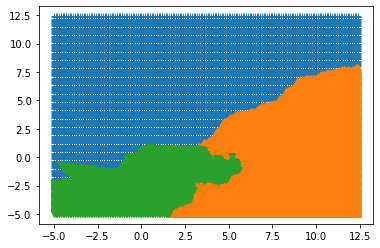

In [183]:
arang = np.arange(-5,12.5,0.1)
grid_x,grid_y = np.meshgrid(arang,arang)

axis_x = np.reshape(grid_x, (-1,1))
axis_y = np.reshape(grid_y, (-1,1))
mesh_xy = np.hstack((axis_x,axis_y))

# 근접이웃 분류기를 통해 새롭게 데이터 분류 
class_new_a_list.clear() 
class_new_b_list.clear()
class_new_c_list.clear()

label_list = []

for i in range(mesh_xy.shape[0]):
  xt = mesh_xy[i]
  
  distance_list.clear() #각 데이터 마다 거리 순위를 뽑아야 하므로 거리 리스트는 초기화
  for j in range(1,len(class_vstack)):   
    distance = np.linalg.norm(xt-class_vstack[j],2) #거리함수는 2차 norm(유클리디안 거리) 사용
    distance_list.append([distance,j])  # j를 함께 리스트에 넣어주는 이유는 라벨링 때문
  
  distance_list.sort(key=lambda x:x[0]) # 가장 가까운 순으로 정렬

  count=[0,0,0] 
  for j in range(0,k):                  # k개 만큼 이웃한 데이터의 투표 진행
    if distance_list[j][1] < row_count*1:
      count[0] = count[0]+1
    elif distance_list[j][1] >= row_count*1 and distance_list[j][1] < row_count*2:
      count[1] = count[1]+1
    elif distance_list[j][1] >= row_count*2:
      count[2] = count[2]+1
  
  tmp = max(count)
  index = count.index(tmp)              # 투표 결과 공개
  
  if index == 0:                        # 투표 결과에 따라 분류가 잘못된 것을 뽑음
    class_new_a_list.append(xt)
    if xt not in class_a:
      Etrain = Etrain +1
      Etrain_list.append(xt)
  elif index == 1:
    class_new_b_list.append(xt)
    if xt not in class_b:
      Etrain = Etrain +1
      Etrain_list.append(xt)
  else :
    class_new_c_list.append(xt)
    if xt not in class_c:
      Etrain = Etrain +1
      Etrain_list.append(xt)
  
  label_list.append(index)

Error_rate = Etrain/(class_vstack.shape[0])

class_new_a=np.array(class_new_a_list)
class_new_b=np.array(class_new_b_list)
class_new_c=np.array(class_new_c_list) 
Etrain_data = np.array(Etrain_list)

plt.plot(class_new_a[:,0], class_new_a[:,1], marker='+', linestyle='None')
plt.plot(class_new_b[:,0], class_new_b[:,1], marker='^', linestyle='None')
plt.plot(class_new_c[:,0], class_new_c[:,1], marker='v', linestyle='None')